In [1]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [2]:
fldr = "./archive/UTKFace"

In [3]:
import os
flies=os.listdir(fldr)

In [4]:
ages=[]
genders=[]
images=[]

for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

./archive/UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./archive/UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./archive/UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./archive/UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./archive/UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./archive/UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./archive/UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./archive/UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./archive/UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./archive/UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./archive/UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./archive/UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./archive/UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./archive/UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./archive/UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./archive/UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./archive/UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./archive/UTKFace/105_1_0_20170

In [5]:
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

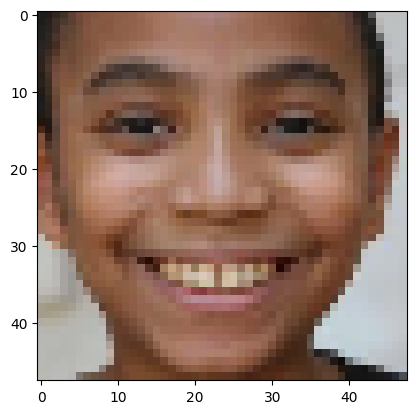

In [6]:
plt.imshow(images[87])


In [7]:
print(ages[87])


10


In [8]:
print(genders[87])


0


In [9]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [10]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [11]:
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


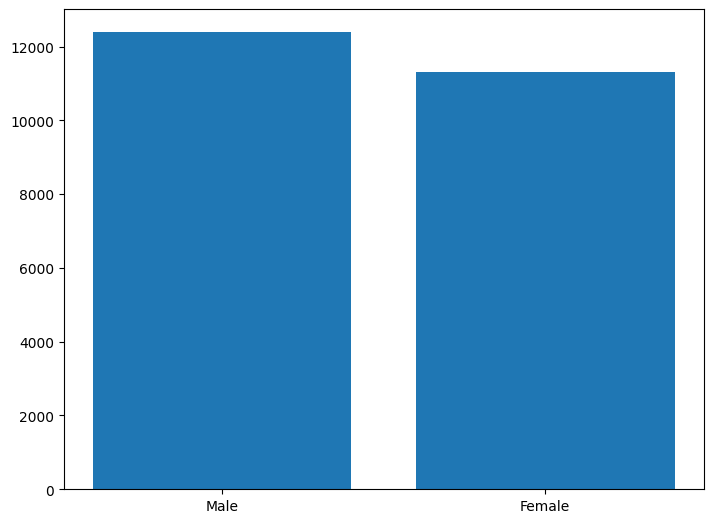

In [12]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

In [13]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [14]:
val=values.tolist()
cnt=counts.tolist()

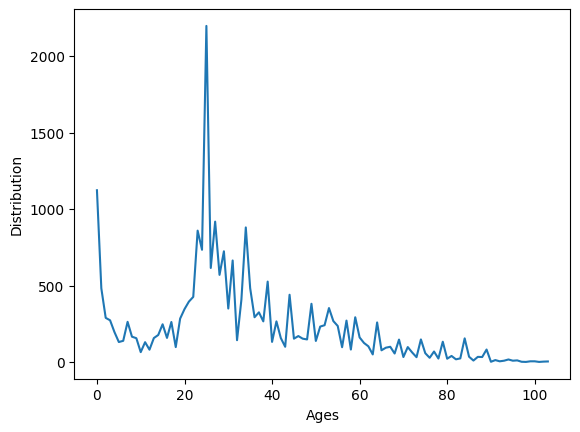

In [15]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [16]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [17]:
images_f_2=images_f/255
images_f_2.shape

(23708, 48, 48, 3)

In [18]:
labels_f=np.array(labels)

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)


In [21]:
Y_train[0:5]


array([[28,  0],
       [21,  0],
       [ 4,  0],
       [28,  0],
       [26,  1]])

In [22]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]
Y_train_2[0][0:5]

array([0, 0, 0, 0, 1])

In [23]:
Y_train_2[1][0:5]


array([28, 21,  4, 28, 26])

In [24]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [25]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model

In [26]:
Model=model((48,48,3))
Model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fle_s='Age_Sex_Detection.h5'
# checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
# Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
# callback_list=[checkpoint,Early_stop]

In [29]:
fle_s = 'Age_Sex_Detection.keras'  # Change file extension to .keras
checkpoint = ModelCheckpoint(
    fle_s,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch'
)
Early_stop = tf.keras.callbacks.EarlyStopping(
    patience=75,
    monitor='val_loss',
    restore_best_weights=True
)
callback_list = [checkpoint, Early_stop]


In [60]:
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# fle_s = 'Age_Sex_Detection.keras'  # Updated file extension

# # Define callbacks
# checkpoint = ModelCheckpoint(
#     fle_s,
#     monitor='val_loss',
#     verbose=1,
#     save_best_only=True,
#     save_weights_only=False,
#     mode='auto',
#     save_freq='epoch'
# )

# Early_stop = EarlyStopping(
#     patience=75,
#     monitor='val_loss',
#     restore_best_weights=True
# )

# callback_list = [checkpoint, Early_stop]


In [ ]:
# # Transpose the labels
# Y_train_2 = Y_train_2.T  # Now shape is (17781, 2)
# Y_test_2 = Y_test_2.T    # Now shape is (5927, 2)

# # Verify the corrected shapes
# print("Corrected Y_train_2 shape:", Y_train_2.shape)
# print("Corrected Y_test_2 shape:", Y_test_2.shape)


In [ ]:
# print("X_train shape:", X_train.shape)

# print("X_test shape:", X_test.shape)
# print("Y_train_2 shape:", Y_train_2.shape)
# print("Y_test_2 shape:", Y_test_2.shape)

In [ ]:
# print("Length of X_train:", len(X_train))
# print("Length of Y_train_2:", (Y_train_2.shape[1]))


In [ ]:
# History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)


In [ ]:
# # Check and reshape inputs if necessary
# print("X_train shape before:", X_train.shape)
# if len(X_train.shape) != 4 or X_train.shape[1:] != (48, 48, 3):
#     X_train = X_train.reshape(-1, 48, 48, 3)
#     X_test = X_test.reshape(-1, 48, 48, 3)
# print("X_train shape after:", X_train.shape)

# # Check and structure labels
# Y_train_gender = np.array(Y_train[:, 1])  # Gender
# Y_train_age = np.array(Y_train[:, 0])     # Age
# Y_train_2 = [Y_train_gender, Y_train_age]

# Y_test_gender = np.array(Y_test[:, 1])    # Gender
# Y_test_age = np.array(Y_test[:, 0])       # Age
# Y_test_2 = [Y_test_gender, Y_test_age]

# # Fit the model
# History = Model.fit(
#     X_train,
#     Y_train_2,
#     batch_size=64,
#     validation_data=(X_test, Y_test_2),
#     epochs=250,
#     callbacks=callback_list
# )


In [33]:
print("Y_train gender shape:", Y_train_2[0].shape)  # Should be (num_samples,)
print("Y_train age shape:", Y_train_2[1].shape)     # Should be (num_samples,)


Y_train gender shape: (17781,)
Y_train age shape: (17781,)


In [34]:
Y_train_gender = Y_train[:, 1]  # Gender
Y_train_age = Y_train[:, 0]     # Age
Y_train_2 = [Y_train_gender, Y_train_age]

Y_test_gender = Y_test[:, 1]    # Gender
Y_test_age = Y_test[:, 0]       # Age
Y_test_2 = [Y_test_gender, Y_test_age]


In [35]:
print("Model outputs:", [output.name for output in Model.outputs])


Model outputs: ['keras_tensor_22', 'keras_tensor_23']


In [36]:
['sex_out/Sigmoid:0', 'age_out/Relu:0']


['sex_out/Sigmoid:0', 'age_out/Relu:0']

In [37]:
validation_data = (X_test, Y_test_2)
print("Validation X_test shape:", X_test.shape)
print("Validation Y_test gender shape:", Y_test_2[0].shape)
print("Validation Y_test age shape:", Y_test_2[1].shape)


Validation X_test shape: (5927, 48, 48, 3)
Validation Y_test gender shape: (5927,)
Validation Y_test age shape: (5927,)


In [38]:
Y_test_gender = Y_test[:, 1]
Y_test_age = Y_test[:, 0]
Y_test_2 = [Y_test_gender, Y_test_age]


In [ ]:
# History = Model.fit(
#     x=[X_train],             # Input
#     y=[Y_train_2[0], Y_train_2[1]],  # Outputs
#     batch_size=64,
#     validation_data=([X_test], [Y_test_2[0], Y_test_2[1]]),
#     epochs=250,
#     callbacks=callback_list
# )


In [40]:
print("X_train shape:", X_train.shape)
print("Y_train_2[0] shape:", Y_train_2[0].shape)
print("Y_train_2[1] shape:", Y_train_2[1].shape)


X_train shape: (17781, 48, 48, 3)
Y_train_2[0] shape: (17781,)
Y_train_2[1] shape: (17781,)


In [41]:
Model.compile(
    loss=["binary_crossentropy", "mae"],
    optimizer="Adam",
    metrics=["accuracy"]
)


In [ ]:
# # Fit the model
# History = Model.fit(
#     x=X_train,
#     y=[Y_train_2[0], Y_train_2[1]],
#     batch_size=64,
#     validation_data=(X_test, [Y_test_2[0], Y_test_2[1]]),
#     epochs=250,
#     callbacks=callback_list
# )


In [43]:
Model.compile(
    loss=["binary_crossentropy", "mae"],  # Loss for each output
    optimizer="adam",
    metrics=[["accuracy"], ["mae"]]  # Metrics for each output
)


In [44]:
History = Model.fit(
    x=X_train,
    y=[Y_train_2[0], Y_train_2[1]],  # Outputs
    batch_size=64,
    validation_data=(X_test, [Y_test_2[0], Y_test_2[1]]),
    epochs=250,
    callbacks=callback_list
)


Epoch 1/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - age_out_loss: 21.6630 - age_out_mae: 21.6630 - loss: 22.4878 - sex_out_accuracy: 0.5870 - sex_out_loss: 0.6795
Epoch 1: val_loss improved from inf to 16.41491, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 22s 68ms/step - age_out_loss: 21.6483 - age_out_mae: 21.6483 - loss: 22.4728 - sex_out_accuracy: 0.5871 - sex_out_loss: 0.6795 - val_age_out_loss: 15.6785 - val_age_out_mae: 15.6592 - val_loss: 16.4149 - val_sex_out_accuracy: 0.6602 - val_sex_out_loss: 0.6675
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - age_out_loss: 14.5987 - age_out_mae: 14.5987 - loss: 15.3105 - sex_out_accuracy: 0.6608 - sex_out_loss: 0.6167
Epoch 2: val_loss improved from 16.41491 to 13.36167, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - age_out_loss: 14.5960 - age_out_mae: 14.5960 - loss: 15.3077 - sex_out_accuracy: 0.6609 - sex_out_loss: 0.6166 - val_age_out_loss: 12.7177 - val_age_

In [45]:
Model.evaluate(X_test,Y_test_2)


186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - age_out_loss: 6.7172 - age_out_mae: 6.7172 - loss: 7.5846 - sex_out_accuracy: 0.8816 - sex_out_loss: 0.2487


[7.489529609680176,
 0.24940072000026703,
 6.620175361633301,
 6.62109375,
 0.8847646117210388]

In [46]:
pred=Model.predict(X_test)


  9/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step   

C:\Users\Chaitanya Katare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 48, 48, 3))
  warnings.warn(msg)


186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [47]:
pred[1]


array([[25.361837],
       [26.364012],
       [17.42886 ],
       ...,
       [73.13907 ],
       [31.336344],
       [60.477356]], dtype=float32)

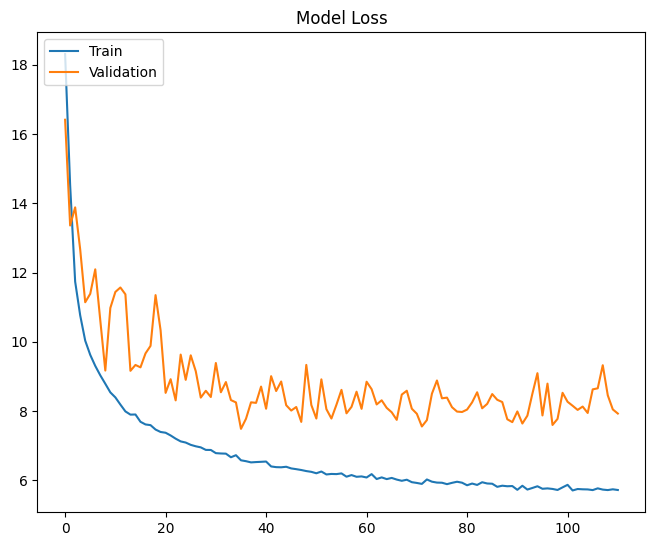

In [48]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

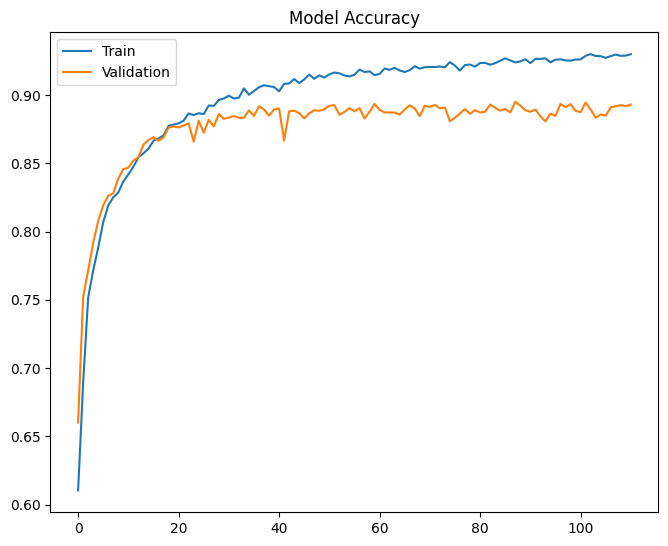

In [49]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

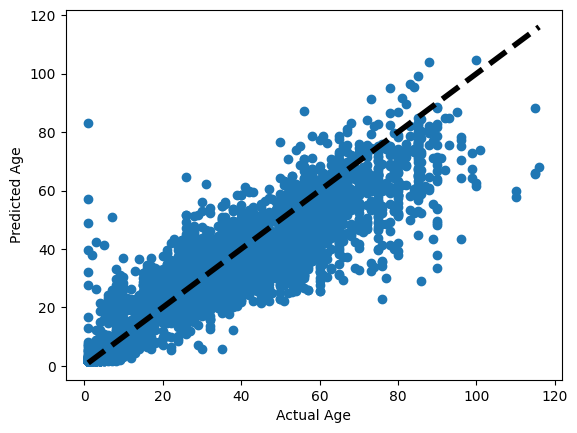

In [50]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [51]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1
    
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
report=classification_report(Y_test_2[0],Pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3089
           1       0.86      0.90      0.88      2838

    accuracy                           0.88      5927
   macro avg       0.88      0.89      0.88      5927
weighted avg       0.89      0.88      0.88      5927



C:\Users\Chaitanya Katare\AppData\Local\Temp\ipykernel_23664\1246858389.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [52]:
results=confusion_matrix(Y_test_2[0],Pred_l)


<Axes: >

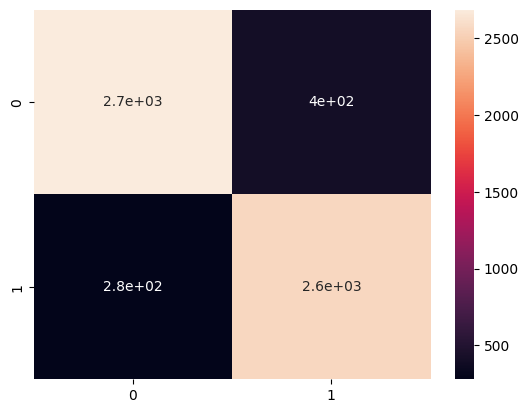

In [55]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [56]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Age is 105
Predicted Gender is Female


C:\Users\Chaitanya Katare\AppData\Local\Temp\ipykernel_23664\964136747.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\Chaitanya Katare\AppData\Local\Temp\ipykernel_23664\964136747.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


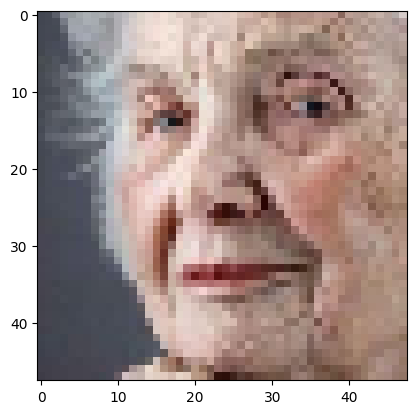

In [62]:
test_image(4,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Age is 9
Predicted Gender is Male


C:\Users\Chaitanya Katare\AppData\Local\Temp\ipykernel_23664\964136747.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\Chaitanya Katare\AppData\Local\Temp\ipykernel_23664\964136747.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


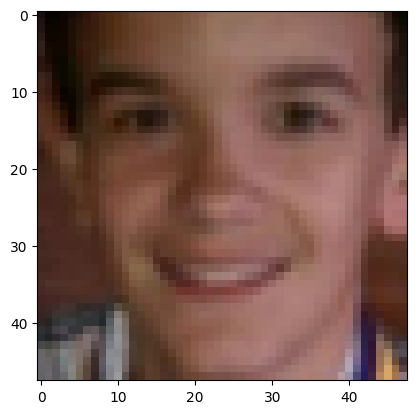

In [63]:
test_image(23,images_f,images_f_2,Model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Age is 25
Predicted Gender is Female


C:\Users\Chaitanya Katare\AppData\Local\Temp\ipykernel_23664\964136747.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\Chaitanya Katare\AppData\Local\Temp\ipykernel_23664\964136747.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


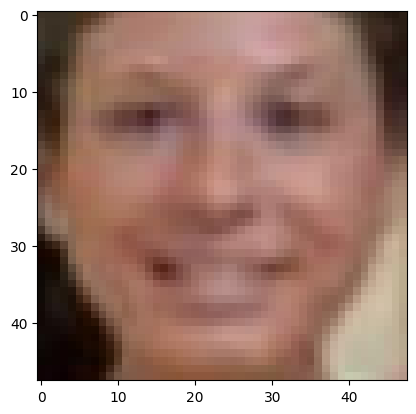

In [65]:
test_image(1123,images_f,images_f_2,Model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Age is 2
Predicted Gender is Female


C:\Users\Chaitanya Katare\AppData\Local\Temp\ipykernel_23664\964136747.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\Chaitanya Katare\AppData\Local\Temp\ipykernel_23664\964136747.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


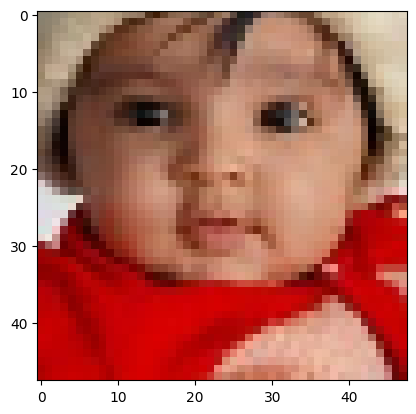

In [66]:
test_image(2553,images_f,images_f_2,Model)
